In [1]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
from datetime import timedelta


In [2]:
os.getcwd()
os.chdir('C:\\Users\\IMEN\\Documents\\openclassroom\\formation openclassrooms\\projet5')

In [3]:
csv_files = glob.glob(os.path.join('datasets', "*.csv"))
csv_files

['datasets\\olist_customers_dataset.csv',
 'datasets\\olist_geolocation_dataset.csv',
 'datasets\\olist_orders_dataset.csv',
 'datasets\\olist_order_items_dataset.csv',
 'datasets\\olist_order_payments_dataset.csv',
 'datasets\\olist_order_reviews_dataset.csv',
 'datasets\\olist_products_dataset.csv',
 'datasets\\olist_sellers_dataset.csv',
 'datasets\\product_category_name_translation.csv']

In [4]:
#9 dataframe (df1..df9)
for i in range(len(csv_files)):   
    data=pd.read_csv(csv_files[i])
    globals()[f'df{i+1}'] =data
    

In [5]:
print(df1.columns)
print('\n')
print(df2.columns)
print('\n')
print(df3.columns)
print('\n')
print(df4.columns)
print('\n')
print(df5.columns)
print('\n')
print(df6.columns)
print('\n')
print(df7.columns)
print('\n')
print(df8.columns)
print('\n')
print(df9.columns)


Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')


Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')


Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')


Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')


Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')


Index(['produc

#### Datframes et valeurs nulles

In [6]:
#msno.bar(df1):ok
#msno.bar(df2):ok
#msno.bar(df3)#contient des nan
#msno.bar(df4)#ok
#msno.bar(df5)#ok
#msno.bar(df6)#contient des nan
#msno.bar(df7)#contient des nan
#msno.bar(df8)#ok

In [7]:
df3.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [8]:
df3=df3[df3.order_status!='canceled']
df3=df3[df3.order_status!='unavailable']

In [9]:
df3.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'created',
       'approved'], dtype=object)

In [10]:
#print('Entrées dupliquées: {}'.format(df1.duplicated().sum()))#0

#print('Entrées dupliquées: {}'.format(df3.duplicated().sum()))#0
#print('Entrées dupliquées: {}'.format(df4.duplicated().sum()))#0
#print('Entrées dupliquées: {}'.format(df5.duplicated().sum()))#0
#print('Entrées dupliquées: {}'.format(df6.duplicated().sum()))#0
#print('Entrées dupliquées: {}'.format(df7.duplicated().sum()))#0
#print('Entrées dupliquées: {}'.format(df8.duplicated().sum()))#0

In [11]:
print('Entrées dupliquées: {}'.format(df2.duplicated().sum()))
df2.drop_duplicates(inplace = True)

Entrées dupliquées: 261831


In [12]:
df4.price.describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

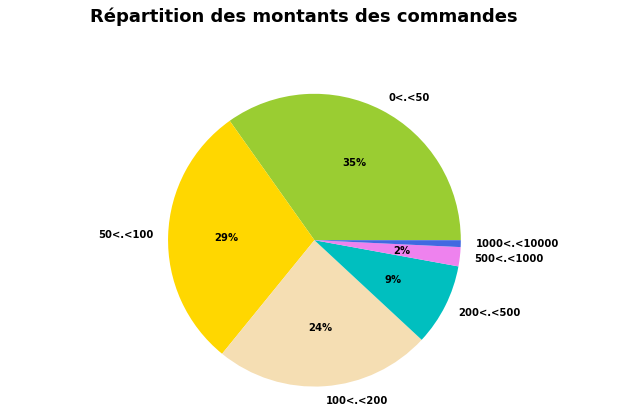

In [13]:
#____________________
# Décompte des achats
price_range = [0, 50, 100, 200, 500, 1000, 10000]
count_price = []
for i, price in enumerate(price_range):
    if i == 0: continue
    val = df4[(df4.price < price) &
                       (df4.price > price_range[i-1])]['price'].count()
    count_price.append(val)
#____________________________________________
# Représentation du nombre d'achats / montant        
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue','firebrick']
labels = [ '{}<.<{}'.format(price_range[i-1], s) for i,s in enumerate(price_range) if i != 0]
sizes  = count_price
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]

ax.pie(sizes, explode = explode, labels=labels, colors = colors,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = False, startangle=0)
ax.axis('equal')
f.text(0.5, 1.01, "Répartition des montants des commandes", ha='center', fontsize = 18);

In [14]:
df7.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [15]:
#Distribution des produits 
product_category=pd.DataFrame(df7.groupby('product_category_name')['product_category_name'].count().reset_index(name='counts'))
product_category


,product_category_name,counts
0,agro_industria_e_comercio,74
1,alimentos,82
2,alimentos_bebidas,104
3,artes,55
4,artes_e_artesanato,19
...,...,...
68,sinalizacao_e_seguranca,93
69,tablets_impressao_imagem,9
70,telefonia,1134
71,telefonia_fixa,116


Text(0.5, 1.0, 'Distribution des catégories de produits')

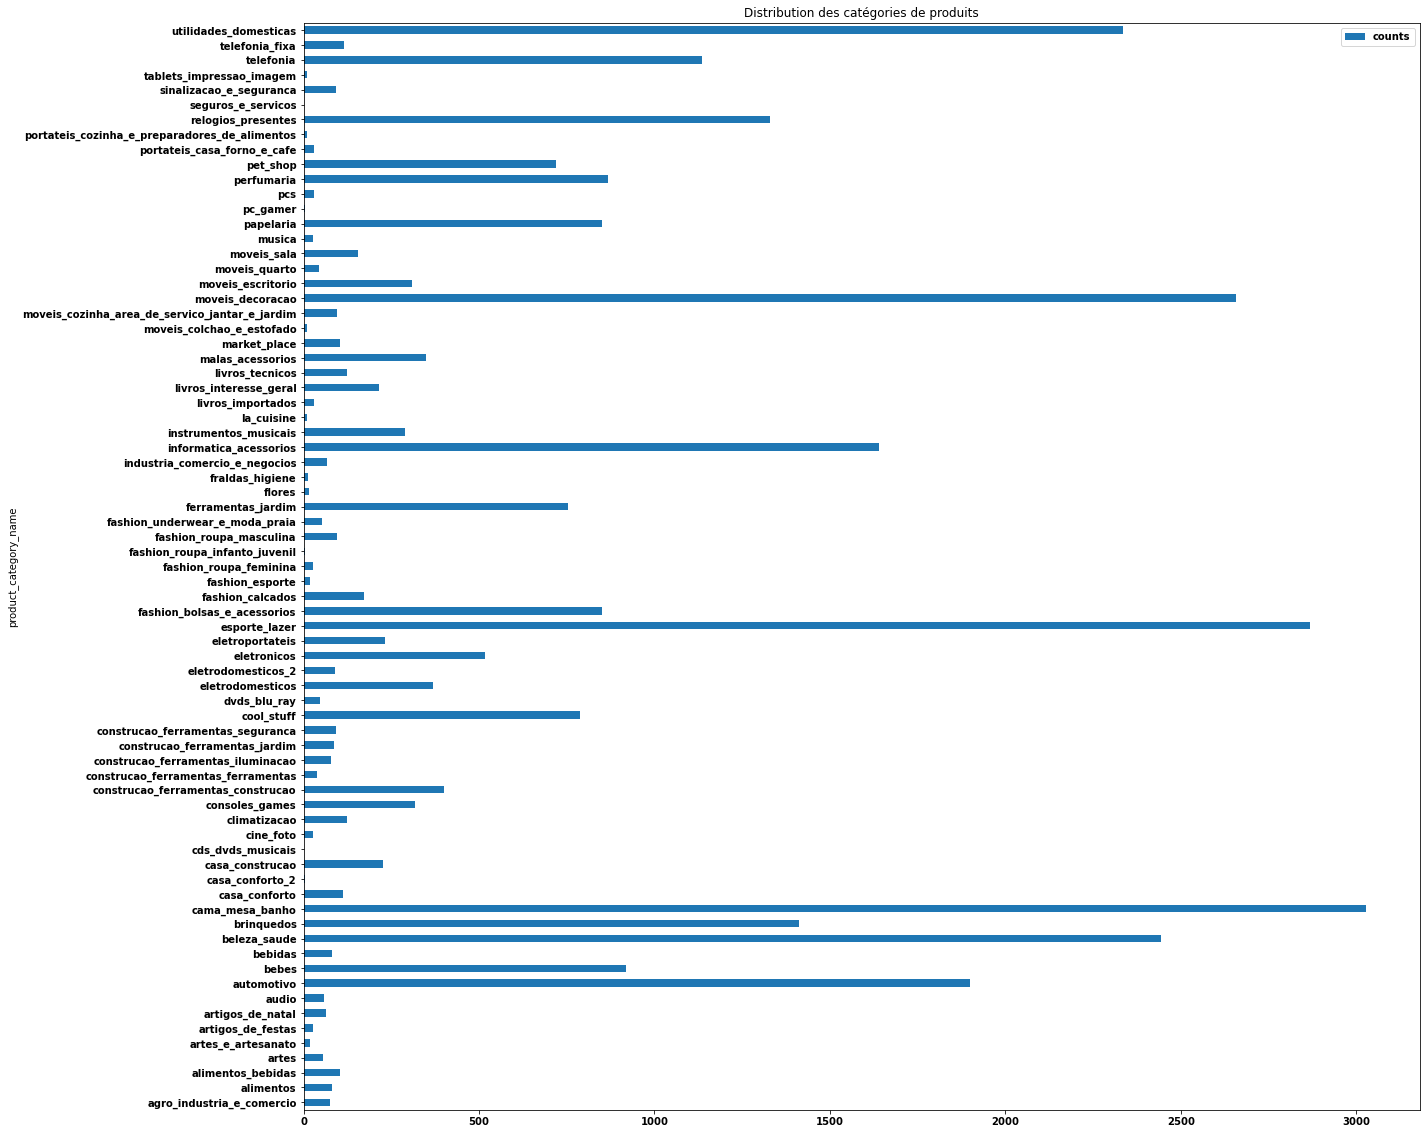

In [16]:


product_category.plot( y='counts', x='product_category_name',kind='barh',figsize=(20,20))
plt.title('Distribution des catégories de produits')

In [17]:
df2.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### Géolocalisation des clients

In [18]:
#df12=pd.merge(df1, df2, left_on=  ['customer_zip_code_prefix','customer_city','customer_state'],
#                   right_on= ['geolocation_zip_code_prefix', 'geolocation_city','geolocation_state'], 
#                  how = 'left')

In [19]:
df12=df2.join(df1.set_index(['customer_zip_code_prefix','customer_city','customer_state']), on=['geolocation_zip_code_prefix', 'geolocation_city','geolocation_state'], how='right')
df12

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,customer_id,customer_unique_id
334422,14409,-20.509897,-47.397866,franca,SP,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0
334449,14409,-20.497396,-47.399241,franca,SP,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0
334459,14409,-20.510459,-47.399553,franca,SP,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0
334462,14409,-20.480940,-47.394161,franca,SP,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0
334463,14409,-20.515413,-47.398194,franca,SP,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0
...,...,...,...,...,...,...,...
174120,6703,-23.598092,-46.904582,cotia,SP,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398
174153,6703,-23.594171,-46.908091,cotia,SP,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398
174253,6703,-23.599369,-46.905603,cotia,SP,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398
174263,6703,-23.584425,-46.892014,cotia,SP,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398


In [20]:
df12.dropna(axis=0,inplace=True)

In [21]:
import folium
from folium import plugins
map = folium.Map()
map = folium.Map(location=[df12['geolocation_lat'].mean(), df12['geolocation_lng'].mean()],zoom_start=10)
for i in range(0,len(df12)):
    folium.Circle([df12.iloc[i]['geolocation_lat'],df12.iloc[i]['geolocation_lng']], 
                      popup=df12.iloc[i]['geolocation_city'], radius =100).add_to(map)
map


KeyboardInterrupt



In [76]:
df2.shape

(1000163, 5)

### Fréquence : combien de fois chaque   client a-t-il effectué un achat ?

In [19]:
#nbre de commandes par client
nb_order_per_customer=pd.DataFrame(df1.groupby('customer_unique_id')['customer_id'].count())\
.rename(columns={'customer_id':'frequency'}).reset_index()
nb_order_per_customer

,customer_unique_id,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,1
96092,fffea47cd6d3cc0a88bd621562a9d061,1
96093,ffff371b4d645b6ecea244b27531430a,1
96094,ffff5962728ec6157033ef9805bacc48,1


In [20]:
#Clients avec plusieurs commandes
customer_with_many_orders=nb_order_per_customer[nb_order_per_customer['frequency']>1]
per_cust_with_many_orders=round(100*customer_with_many_orders.shape[0]/nb_order_per_customer.shape[0],2)
print(f'{per_cust_with_many_orders} % des clients ayant réalisés plusieurs commandes')

3.12 % des clients ayant réalisés plusieurs commandes


In [21]:
#Clients avec une seule commande
customer_with_one_order=nb_order_per_customer[nb_order_per_customer['frequency']==1]
per_cust_with_one_order=round(100*customer_with_one_order.shape[0]/nb_order_per_customer.shape[0],2)
print(f'{per_cust_with_one_order} % des clients ayant réalisés une seule commande')

96.88 % des clients ayant réalisés une seule commande


In [22]:
nb_order_per_customer['frequency'].unique()

array([ 1,  2,  3,  4,  6,  7,  5,  9, 17], dtype=int64)

In [130]:
nb_order_per_customer.columns

Index(['customer_unique_id', 'frequency'], dtype='object')

In [28]:
df1.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [23]:
#client avec le nombre de commandes passées
df_freq=pd.merge(df1,nb_order_per_customer,on='customer_unique_id')
#df_customers=df_customers[['customer_unique_id','customer_city','nb_order']]
df_freq

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,frequency
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1
...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1


### Récence d'un client : à quel moment un client a effectué un dernier achat?

In [133]:
df3.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [28]:
df3['order_purchase_timestamp'].isna().mean()

0.0

In [25]:
df13 = pd.merge(df_freq, df3, on='customer_id', how='inner')
df13.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,frequency,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [26]:
df13['order_purchase_timestamp'].dtypes

dtype('O')

In [54]:
df13.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date'],
      dtype='object')

In [29]:
#Ici on détermine à quel moment un client a effectué un dernier achat
# convertir la date d'achat en format datetime 
df13['Date']= pd.to_datetime(df13['order_purchase_timestamp'])
# la date NOW à un jour après le dernier achat. Cette date sera utilisée comme référence pour calculer le score de récence.
NOW = df13['Date'].max() + timedelta(days=1)
# keep only the most recent date of purchase
df13['rank'] = df13.sort_values(['customer_unique_id','Date'],ascending=False).groupby(['customer_unique_id'])['Date'].rank(method='min').astype(int)
freq_rec = df13[df13['rank']==1]
freq_rec.head()
#df_rec[['customer_unique_id','customer_city','order_id','Date','rank']]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,frequency,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Date,rank
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,2017-05-16 15:05:35,1
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,2018-01-12 20:48:24,1
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,2018-05-19 16:07:45,1
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,2018-03-13 16:06:38,1
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,2018-07-29 09:51:30,1


In [30]:
df13['rank'].unique()

array([ 1,  2,  3,  4,  5,  6,  8,  9,  7, 10, 11, 15, 14, 17, 12, 16, 13])

In [147]:
df13.shape

(99441, 15)

### Valeur monétaire

In [80]:
df4.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [55]:
df4=df4[df4['price']> 0]

In [36]:
ord_product_price=pd.DataFrame(df4.groupby('order_id')['price'].sum())\
.rename(columns={'price':'total_price'}).reset_index()
ord_product_price

,order_id,total_price
0,00010242fe8c5a6d1ba2dd792cb16214,58.90
1,00018f77f2f0320c557190d7a144bdd3,239.90
2,000229ec398224ef6ca0657da4fc703e,199.00
3,00024acbcdf0a6daa1e931b038114c75,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99
98662,fffcd46ef2263f404302a634eb57f7eb,350.00
98663,fffce4705a9662cd70adb13d4a31832d,99.90
98664,fffe18544ffabc95dfada21779c9644f,55.99


In [37]:
df=pd.merge(freq_rec,ord_product_price,on='order_id',how='inner')
df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'frequency', 'order_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'Date', 'rank', 'total_price'],
      dtype='object')

In [47]:
df['DaysSinceOrder'] = df['Date'].apply(lambda x: (NOW - x).days)


In [48]:
df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,frequency,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Date,rank,total_price,DaysSinceOrder
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,2017-05-16 15:05:35,1,124.99,520
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,2018-01-12 20:48:24,1,289.00,278
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,2018-05-19 16:07:45,1,139.94,152
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,2018-03-13 16:06:38,1,149.94,219
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,2018-07-29 09:51:30,1,230.00,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,2018-04-07 15:48:17,1,74.90,194
95658,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,2018-04-04 08:20:22,1,114.90,197
95659,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,2018-04-08 20:11:50,1,37.00,192
95660,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,2017-11-03 21:08:33,1,689.00,348


In [50]:
RFM=df[['customer_unique_id','frequency','DaysSinceOrder','total_price']].rename(columns={'frequency':'Frequency','DaysSinceOrder':'Recency','total_price':'Monetary'})

RFM

,customer_unique_id,Frequency,Recency,Monetary
0,861eff4711a542e4b93843c6dd7febb0,1,520,124.99
1,290c77bc529b7ac935b93aa66c333dc3,1,278,289.00
2,060e732b5b29e8181a18229c7b0b2b5e,1,152,139.94
3,259dac757896d24d7702b9acbbff3f3c,1,219,149.94
4,345ecd01c38d18a9036ed96c73b8d066,1,81,230.00
...,...,...,...,...
95657,1a29b476fee25c95fbafc67c5ac95cf8,1,194,74.90
95658,d52a67c98be1cf6a5c84435bd38d095d,1,197,114.90
95659,e9f50caf99f032f0bf3c55141f019d99,1,192,37.00
95660,73c2643a0a458b49f58cea58833b192e,1,348,689.00


#### RFM scores

In [60]:
RFM["Frequency"].unique()

array([ 1,  2,  4,  3,  5,  6,  9,  7, 17], dtype=int64)

In [64]:
RFM["R"] = pd.qcut(RFM["Recency"],5,labels=[5,4,3,2,1])
RFM["F"] = pd.qcut(RFM["Frequency"],5,duplicates='drop')
RFM["M"] = pd.qcut(RFM["Monetary"],5,labels=[1,2,3,4,5])
#RFM["RFM_Score"] = RFM["R"].astype(str) +RFM["F"].astype(str) + RFM["M"].astype(str)
RFM

,customer_unique_id,Frequency,Recency,Monetary,R,F,M,RFM_Score
0,861eff4711a542e4b93843c6dd7febb0,1,520,124.99,1,"(0.999, 17.0]",4,"1(0.999, 17.0]4"
1,290c77bc529b7ac935b93aa66c333dc3,1,278,289.00,3,"(0.999, 17.0]",5,"3(0.999, 17.0]5"
2,060e732b5b29e8181a18229c7b0b2b5e,1,152,139.94,4,"(0.999, 17.0]",4,"4(0.999, 17.0]4"
3,259dac757896d24d7702b9acbbff3f3c,1,219,149.94,4,"(0.999, 17.0]",4,"4(0.999, 17.0]4"
4,345ecd01c38d18a9036ed96c73b8d066,1,81,230.00,5,"(0.999, 17.0]",5,"5(0.999, 17.0]5"
...,...,...,...,...,...,...,...,...
95657,1a29b476fee25c95fbafc67c5ac95cf8,1,194,74.90,4,"(0.999, 17.0]",3,"4(0.999, 17.0]3"
95658,d52a67c98be1cf6a5c84435bd38d095d,1,197,114.90,4,"(0.999, 17.0]",4,"4(0.999, 17.0]4"
95659,e9f50caf99f032f0bf3c55141f019d99,1,192,37.00,4,"(0.999, 17.0]",1,"4(0.999, 17.0]1"
95660,73c2643a0a458b49f58cea58833b192e,1,348,689.00,2,"(0.999, 17.0]",5,"2(0.999, 17.0]5"
